<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(*) 
FROM public.vacancies
'''

In [8]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
# текст запроса
query = f'''
SELECT COUNT(*) 
FROM public.employers
'''

In [10]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
# текст запроса
query = f'''
SELECT COUNT(*) 
FROM public.areas
'''

In [12]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [13]:
# текст запроса
query = f'''
SELECT COUNT(*) 
FROM public.industries
'''

In [14]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,294


***

# Выводы по предварительному анализу данных
1. База данных представляет собой набор таблиц, часть из которых связана друг с другом ключами;
2. Таблица с вакансиями имеет наибольшее число признаков и является основным источником для анализа;
3. В среднем на каждого работодателя приходится две вакансии (49197 / 23501).

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [21]:
# текст запроса
query = f'''
SELECT area_id, COUNT(*) AS cnt
FROM public.vacancies
GROUP BY area_id
ORDER BY cnt DESC
'''

In [22]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df.head(5))
# выводим наименования регионов по их area_id
query = f'''
SELECT id, name
FROM public.areas
WHERE id IN (1, 2, 1002, 4, 160)
ORDER BY id
'''
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\456467274.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,area_id,cnt
0,1,5333
1,2,2851
2,1002,2112
3,4,2006
4,160,1892


C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\456467274.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,name
0,1,Москва
1,2,Санкт-Петербург
2,4,Новосибирск
3,160,Алматы
4,1002,Минск


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [23]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [24]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [25]:
# текст запроса
query = f'''
SELECT ROUND(AVG(salary_from)) AS avg_salary_from, ROUND(AVG(salary_to)) AS avg_salary_to
FROM public.vacancies
'''

In [26]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [27]:
# текст запроса
query = f'''
SELECT schedule, employment, COUNT(*) AS cnt
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY cnt DESC
'''

In [28]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [29]:
# текст запроса
query = f'''
SELECT experience, COUNT(*) AS cnt
FROM public.vacancies
GROUP BY experience
ORDER BY cnt
'''

In [30]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

C:\Users\Николай\AppData\Local\Temp\ipykernel_1968\320468490.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary = pd.read_sql_query(query_salary, connection)


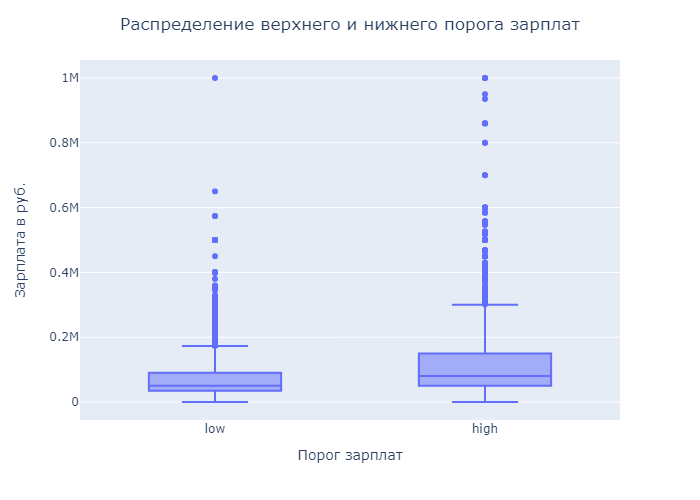

In [4]:
import plotly.express as px


# выведем столбцы с нижним и верхним порогом зарплат
query_salary = f'''select v.salary_from low, 
    v.salary_to high
    from vacancies v
'''
df_salary = pd.read_sql_query(query_salary, connection)
# построим теперь коробчатую диаграмму
fig = px.box(
    data_frame=df_salary
)
fig.update_layout(title_text='Распределение верхнего и нижнего порога зарплат', title_x=0.5)
fig.update_xaxes(dict(title='Порог зарплат', zeroline=False))
fig.update_yaxes(dict(title='Зарплата в руб.', zeroline=False))
fig.show('png')
fig.write_html("plotly/box1.html")

# Выводы по детальному анализу вакансий
1. Вакансии представлены не только по России. Есть вакансии из других стран например, Казахстан, Грузия, Армения и др;
2. Многие работодатели не указывают данные по зарплате, только в половине вакансий указан минимальный или максимальный порог. Скорее всего такие работодатели предпочитают обсуждать зарплатные ожидания только с кандидатами, максимально подходящими по опыту;
3. На мой взгляд, средние показатели по зарплатам не отражают реальное распределение. Предпочтительней использовать медианные значения (см. график выше). Вилка медианных зарплат находится от 50000 рублей до 80000 рублей, в то время как средние показатели той же вилки - от 71000 до 110000 рублей соответственно;
4. В подавляющем количестве вакансий требуются сотрудники для работы в офисе (или предприятии) на полный рабочий день. Вакансии с удаленным типом работы на втором месте по количеству. Вместе они составляют 85% от общего числа вакансий;
5. В статистике по опыту можно заметить, что работодатели гораздо сильнее заинтересованы с работниках с минимальным опытом и значительно реже ищут сотрудников без опыта.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [32]:
# текст запроса
query = f'''
WITH ranked_employers AS (
    SELECT employer_id, COUNT(*) AS cnt,
           RANK() OVER (ORDER BY COUNT(*) DESC) as rank
    FROM public.vacancies
    GROUP BY employer_id
)
SELECT e.name, re.cnt
FROM ranked_employers re
JOIN public.employers e ON re.employer_id = e.id
WHERE re.rank IN (1, 5)
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,cnt
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [34]:
# текст запроса
query = f'''
WITH region_vacancies AS (
    SELECT a.id AS area_id, COUNT(v.id) AS vacancy_count
    FROM public.areas a
    LEFT JOIN public.vacancies v ON a.id = v.area_id
    GROUP BY a.id
),
region_employers AS (
    SELECT a.id AS area_id, COUNT(e.id) AS employer_count
    FROM public.areas a
    LEFT JOIN public.employers e ON a.id = e.area
    GROUP BY a.id
)
SELECT 
    rv.area_id, 
    a.name AS region_name, 
    rv.vacancy_count, 
    re.employer_count
FROM 
    region_vacancies rv
JOIN 
    region_employers re ON rv.area_id = re.area_id
JOIN 
    public.areas a ON rv.area_id = a.id
ORDER BY 
    rv.vacancy_count, re.employer_count DESC
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,area_id,region_name,vacancy_count,employer_count
0,113,Россия,0,410
1,40,Казахстан,0,207
2,2019,Московская область,0,75
3,1438,Краснодарский край,0,19
4,1530,Ростовская область,0,18
...,...,...,...,...
1357,160,Алматы,1892,721
1358,4,Новосибирск,2006,573
1359,1002,Минск,2112,1115
1360,2,Санкт-Петербург,2851,2217


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [36]:
# текст запроса
query = f'''
SELECT MAX(region_count) AS max_region_count
FROM (
    SELECT employer_id, COUNT(DISTINCT area_id) AS region_count
    FROM public.vacancies
    GROUP BY employer_id
) AS employer_region_counts
'''

In [37]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,max_region_count
0,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [38]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.employers e
WHERE NOT EXISTS (
    SELECT 1
    FROM public.employers_industries ei
    WHERE e.id = ei.employer_id
)
'''

In [39]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [40]:
# текст запроса
query = f'''
WITH company_industries_count AS (
    SELECT employer_id, COUNT(industry_id) AS industry_count
    FROM public.employers_industries
    GROUP BY employer_id
    HAVING COUNT(industry_id) = 4
)
SELECT e.name
FROM public.employers e
JOIN company_industries_count cic ON e.id = cic.employer_id
ORDER BY e.name
LIMIT 1 OFFSET 2
'''

In [41]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [42]:
# текст запроса
query = f'''
SELECT COUNT(DISTINCT employer_id)
FROM public.employers_industries ei
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [66]:
# код для получения списка городов-милионников
# Выполнение запроса к внешнему источнику для получения списка городов-миллионников России
import requests
from bs4 import BeautifulSoup

million_cities = []
# Загрузка веб-страницы
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# Поиск таблицы с городами-миллионниками
table = str(soup.find('table', class_='standard'))
# Получение списка городов-миллионников из таблицы
cities = table.split('title="')[3:]
for i in cities:
    million_cities.append(i.split('">')[0])
# Вывод списка городов-миллионников
print(million_cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [68]:
# текст запроса
query = f'''
WITH vacancies_per_region AS (
    SELECT a.name, COUNT(v.id) AS cnt
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    JOIN public.areas a ON v.area_id = a.id
    WHERE e.name = 'Яндекс'
    GROUP BY a.name
),
total_vacancies AS (
    SELECT 'Total' AS name, COUNT(v.id) AS cnt
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс'
)
SELECT * FROM vacancies_per_region
UNION ALL
SELECT * FROM total_vacancies
ORDER BY cnt DESC, name
'''

In [77]:
# результат запроса
df = pd.read_sql_query(query, connection)
# Фильтрация DataFrame для удаления городов, которые не являются миллионниками
df_filtered = df[df['name'].isin(million_cities)]
# Вычисление общего количества вакансий
total_vacancies = df_filtered['cnt'].sum()
# Добавление строки 'Total' с общим количеством вакансий
total_row = pd.DataFrame([['Total', total_vacancies]], columns=['name', 'cnt'])
# Объединение отфильтрованного DataFrame с строкой 'Total'
df_final = pd.concat([df_filtered, total_row], ignore_index=True)
display(df_final)

C:\Users\Николай\AppData\Local\Temp\ipykernel_6252\553404360.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


***

In [93]:
# выведем наиболее часто встречающиеся сферы деятельности у работодателей
query_5 = f'''select i.name ind, count(e.name) cnt
    from employers_industries ei
    left join employers e on ei.employer_id = e.id
    left join industries i on ei.industry_id = i.id
    group by 1
    order by 2 desc
    limit 10
'''
df = pd.read_sql_query(query_5, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\4081277236.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ind,cnt
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
5,Кадровые агентства,389
6,"Электронно-вычислительная, оптическая, контрол...",374
7,Розничная сеть (продуктовая),368
8,Интернет-магазин,351
9,"Архитектура, проектирование",346


# Выводы по анализу работодателей
1. В топ-10 работодателей по количеству вакансий входят в основном компании, связанные с информационными технологиями и активно внедряющие высокотехнологичные решения. Таким образом, мы можем сделать вывод, что спрос на IT специалистов достаточно велик;
2. Также, проанализировав наиболее популярные сферы деятельности у работодателей, можно заметить, что разработка ПО, системная интеграция и интернет технологии с существенным отрывом лидируют среди остальных отраслей. Это может означать, что ведение бизнеса, связанного с этими сферами, рентабельно: есть спрос на данные услуги и компании получают достаточную прибыль для покрытия издержек и дальнейшего роста.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [4]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [6]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%' OR 
        LOWER(name) LIKE '%data science%' OR 
        LOWER(name) LIKE '%исследователь данных%' OR 
        LOWER(name) LIKE '%ml%' OR 
        LOWER(name) LIKE '%machine learning%' OR 
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (
        LOWER(name) LIKE '%junior%' OR 
        experience = 'Нет опыта' OR 
        employment = 'Стажировка'
    )
    AND LOWER(name) NOT LIKE '%html%'
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [35]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%' OR 
        LOWER(name) LIKE '%data science%' OR 
        LOWER(name) LIKE '%исследователь данных%' OR 
        name LIKE '%ML%' OR 
        LOWER(name) LIKE '%machine learning%' OR 
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (
        LOWER(key_skills) LIKE '%sql%' OR 
        LOWER(key_skills) LIKE '%postgres%'
    )
    AND LOWER(name) NOT LIKE '%html%'
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [37]:
# текст запроса
query = f'''
SELECT COUNT(*)
FROM public.vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%' OR 
        LOWER(name) LIKE '%data science%' OR 
        LOWER(name) LIKE '%исследователь данных%' OR 
        name LIKE '%ML%' OR 
        LOWER(name) LIKE '%machine learning%' OR 
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (
        LOWER(key_skills) LIKE '%python%'
    )
    AND LOWER(name) NOT LIKE '%html%'
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [83]:
# текст запроса
query = f'''
select round(avg(
            length(v.key_skills)
            -length(replace(v.key_skills, CHR(9), ''))
            +1
            ), 2)
    from vacancies v
    where (lower(v.name) like '%data scientist%' 
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or (v.name like '%ML%' 
            and v.name not like '%HTML%')
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%')
        and v.key_skills is not null
'''

In [84]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [87]:
# текст запроса
query = f'''
select round(avg(
        coalesce(
            (v.salary_from+v.salary_to)/2, 
            v.salary_from, 
            v.salary_to, 
            0
            )
        ))
    from vacancies v
    where (lower(v.name) like '%data scientist%' 
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or (v.name like '%ML%' 
            and v.name not like '%HTML%')
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%')
        and 
        (v.salary_from is not null 
        or v.salary_to is not null)
        and v.experience = 'От 3 до 6 лет'
'''

In [88]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2018853382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,243115.0


***

In [94]:
# дополнительно оценим зависимость среднего числа указываемых ключевых навыков и средней заработной платы от опыта дата саентиста
query_6 = f'''select 
            v.experience,
            avg(length(v.key_skills)
            -length(replace(v.key_skills, CHR(9), ''))
            +1) avg_skill,
            avg(coalesce(
            (v.salary_from+v.salary_to)/2, 
            v.salary_from, 
            v.salary_to, 
            0)) avg_salary
    from vacancies v
    where (lower(v.name) like '%data scientist%' 
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or (v.name like '%ML%' 
            and v.name not like '%HTML%')
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%')
        and v.key_skills is not null
        and
        (v.salary_from is not null 
        or v.salary_to is not null)
    group by v.experience
    order by 3 desc
'''
df = pd.read_sql_query(query_6, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\2208022468.py:27: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,avg_skill,avg_salary
0,От 3 до 6 лет,5.444444,243114.666667
1,От 1 года до 3 лет,6.833333,146703.875000
2,Нет опыта,7.714286,74642.857143


# Выводы по предметному анализу
1. Более 3% вакансий так или иначе связаны с данными. Это подтверждает высокий уровень спроса на специалистов в данной области;
2. Однако, количество вакансий для начинающих дата сайентистов очень низкое. Это может говорить о перенасыщенности рынка выпускниками курсов и студентами, у которых еще нет опыта и конкуренция на данном уровне очень высокая. Также можно предположить, что работодатели больше заитересованы в трудоустройстве кандидатов с опытом;
3. Зарплаты в области data science начинаются от 70000 руб. и имеют быструю динамику роста с каждым годом полученного опыта;
4. С опытом среднее число ключевых навыков уменьшается это говорит о том, что кандидат с большим опытом имеет больше ключевых навыков, что позволяет не указывать их все в вакансии, но можно заметить, что планка навыков завышается для начальных позиций, что подтверждает высокий уровень конкуренции в отрасли.

# Общий вывод по проекту

Основываясь на анализе базы данных, было определено, что на рынке сохраняется дефицит опытных кандидатов в IT секторе. Многие высокотехнологичные компании предлагают конкурентные заплаты для привлечения лучших специалистов. При этом чем больше город, тем большую заработную плату он предлагает. Наибольшее число вакансий в крупнейших городах РФ и СНГ наблюдается по таким напралениям как разработка ПО и системная интеграция. Стоит отметить, что работодатели заинтересованы в трудоустройстве кандидатов с опытом. Те кандидаты, у кого нет опыта вероятнее всего столкнутся с высокой конкуренцией. Им также предстоит овладеть бОльшим числом навыков, чтобы потенциальный работодатель их заметил.

In [95]:
# проведем дополнительный анализ заработной платы в различных сферах деятельности
query_7_1 = f'''select i.name,
            avg(coalesce(
            (v.salary_from+v.salary_to)/2, 
            v.salary_from, 
            v.salary_to, 
            0))
    from vacancies v 
    left join employers e on e.id = v.employer_id
    left join employers_industries ei on e.id = ei.employer_id
    left join industries i on ei.industry_id = i.id
    where v.salary_from is not null 
        or v.salary_to is not null
    group by i.name
    having count(v.id) > 100
    order by 2 desc
'''

df = pd.read_sql_query(query_7_1, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\3860518045.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,avg
0,Кадровые агентства,144529.656821
1,"Дорожно-строительная техника, сельскохозяйстве...",119919.132075
2,"Оборудование для пищевой промышленности, упако...",119656.169811
3,"Финансово-кредитное посредничество (биржа, бро...",117714.286458
4,Разработка программного обеспечения,117658.561461
...,...,...
69,Государственные организации,58507.712707
70,"Безопасность, охранная деятельность",56957.284483
71,Оптоволоконная связь,52335.211161
72,Мобильная связь,52299.932615


In [96]:
# проведем дополнительный анализ зависимости средней заработной платы от региона
query_7_2 = f'''select a.name,
            avg(coalesce(
            (v.salary_from+v.salary_to)/2, 
            v.salary_from, 
            v.salary_to, 
            0))
    from vacancies v 
    left join areas a on v.area_id = a.id
    where v.salary_from is not null 
        or v.salary_to is not null
    group by a.name
    having count(v.id) > 100
    order by 2 desc    
'''

df = pd.read_sql_query(query_7_2, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\1193234494.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,avg
0,Армения,219569.726415
1,Москва,134140.171482
2,Новосибирск,107776.716900
3,Санкт-Петербург,104409.772236
4,Сочи,99437.200000
5,Томск,99318.514286
6,Нижний Новгород,96058.730882
7,Пермь,95984.659091
8,Ростов-на-Дону,94065.385621
9,Калининград,92357.033149


In [97]:
# изучим распределение работодателей по регионам и сферам деятельности
query_7_3 = f'''select a.name region,
        i.name ind, count(*)  
    from vacancies v 
    left join employers e on e.id = v.employer_id
    left join employers_industries ei on e.id = ei.employer_id
    left join industries i on ei.industry_id = i.id
    left join areas a on v.area_id = a.id
    where i.name is not null
    group by i.name, a.name
    order by 3 desc
    limit 20
'''

df = pd.read_sql_query(query_7_3, connection)
display(df)

C:\Users\Николай\AppData\Local\Temp\ipykernel_7224\793411522.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,region,ind,count
0,Москва,Разработка программного обеспечения,1294
1,Москва,"Системная интеграция, автоматизации технологи...",1117
2,Минск,Разработка программного обеспечения,1023
3,Санкт-Петербург,Разработка программного обеспечения,908
4,Москва,"Интернет-компания (поисковики, платежные систе...",798
5,Санкт-Петербург,"Системная интеграция, автоматизации технологи...",679
6,Москва,Банк,603
7,Новосибирск,Разработка программного обеспечения,580
8,Алматы,"Системная интеграция, автоматизации технологи...",539
9,Нижний Новгород,Разработка программного обеспечения,538
